# PageRank




Le PageRank (ou PR) est l'algorithme d'analyse des liens utilisé par le moteur de recherche Google pour mesurer l'importance relative des pages web. Intégré au système de classement global, il permet de hiérarchiser les résultats de recherche.

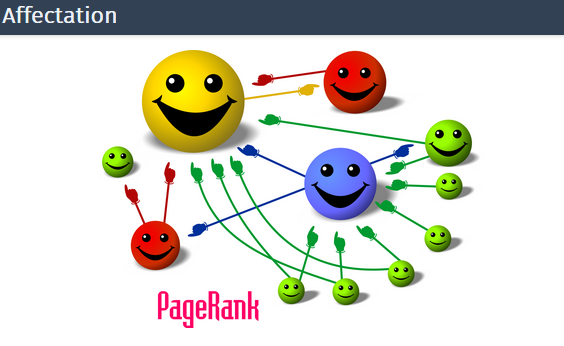



# Problème et objectif du PageRank



Le PageRank est un algorithme conçu pour mesurer l’importance relative des pages Web.

L’idée centrale est que :

- une page est importante si elle est citée par d’autres pages importantes,

- tous les liens n’ont pas la même valeur.

Le PageRank mesure l’importance d’une page en fonction de la quantité et de la qualité des liens entrants.

Le Web est modélisé comme un graphe orienté :
- nœuds : pages Web
- arcs orientés : liens hypertextes

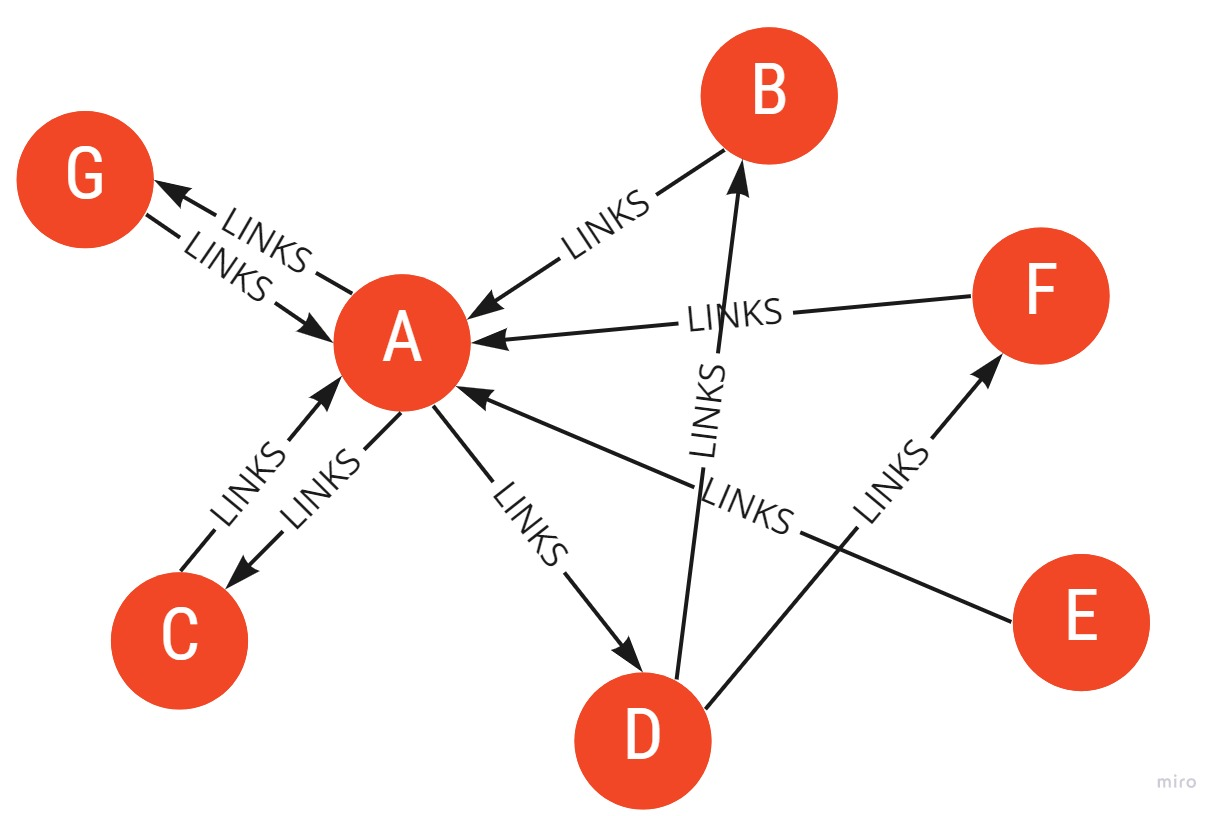



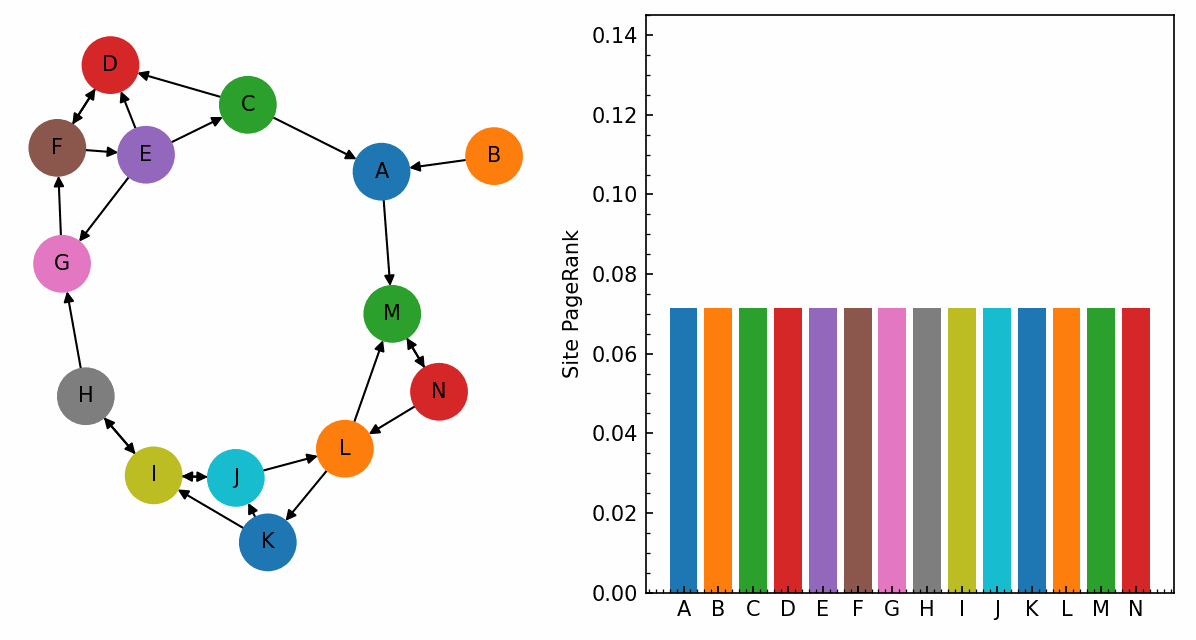



## Fonctionnement 

Le principe de base consiste à attribuer à chaque page une valeur (ou score) proportionnelle à la probabilité qu'un utilisateur arrive sur cette page en parcourant le Web et en cliquant aléatoirement sur les liens. Ainsi, plus une page est liée par d'autres pages importantes, plus son score est élevé. 

### Random browsing (navigation aléatoire)

On modélise la navigation sur le Web par un **surfeur aléatoire**.

Hypothèses :
- Chaque page a la même probabilité d’être la page de départ
- Sur une page, chaque lien sortant a la même probabilité d’être cliqué
- Il y a au plus un lien d’une page vers une autre
- S’il n’y a aucun lien sortant, la page suivante est choisie uniformément parmi toutes les pages

Ces hypothèses définissent un processus aléatoire de navigation sur le graphe du Web.

# Idée principale du PageRank

On note X^(k) la page sur laquelle se trouve le surfeur après (k) clics. 

observations:
- Pour un petit k, la position dépend fortement de la page initiale
- Quand k augmente, cette dependance disparaît
- le surfeur atteint une distribution stable

Le pageRank d'une page est défini comme la probabiité limite d"être sur cette page. Il correspond donc à une probabilité à long terme 

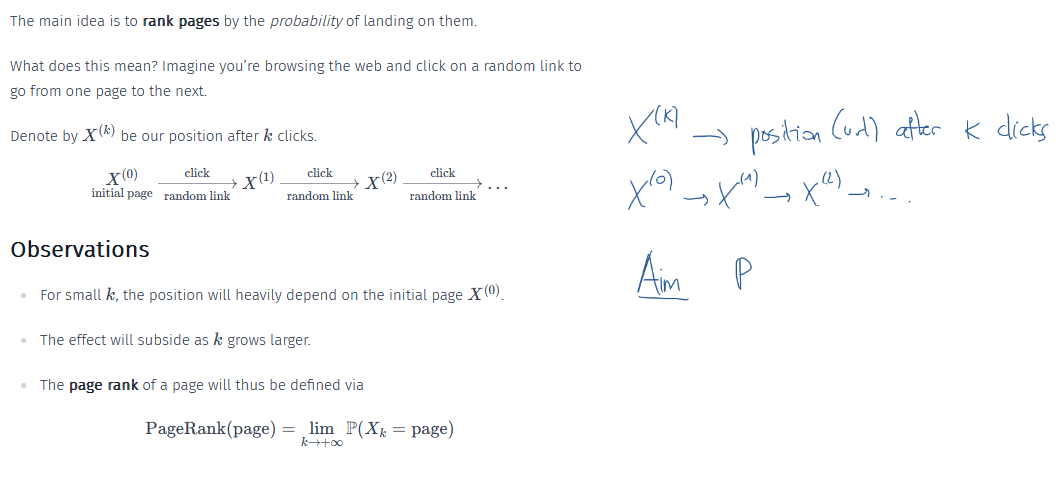

#  Vecteur de probabilité 

On définit le vecteur de probabilité après (k) clics:

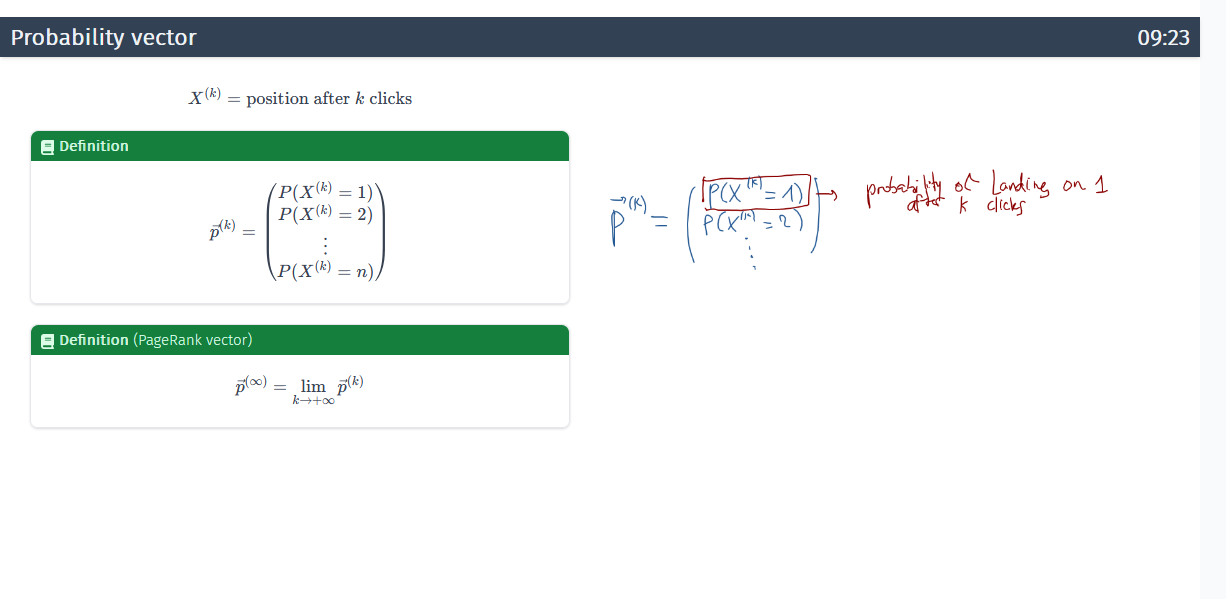

chaque composante représente la probabilité d'être sur une page donné après k clics.



# Matrice de transition stochastique



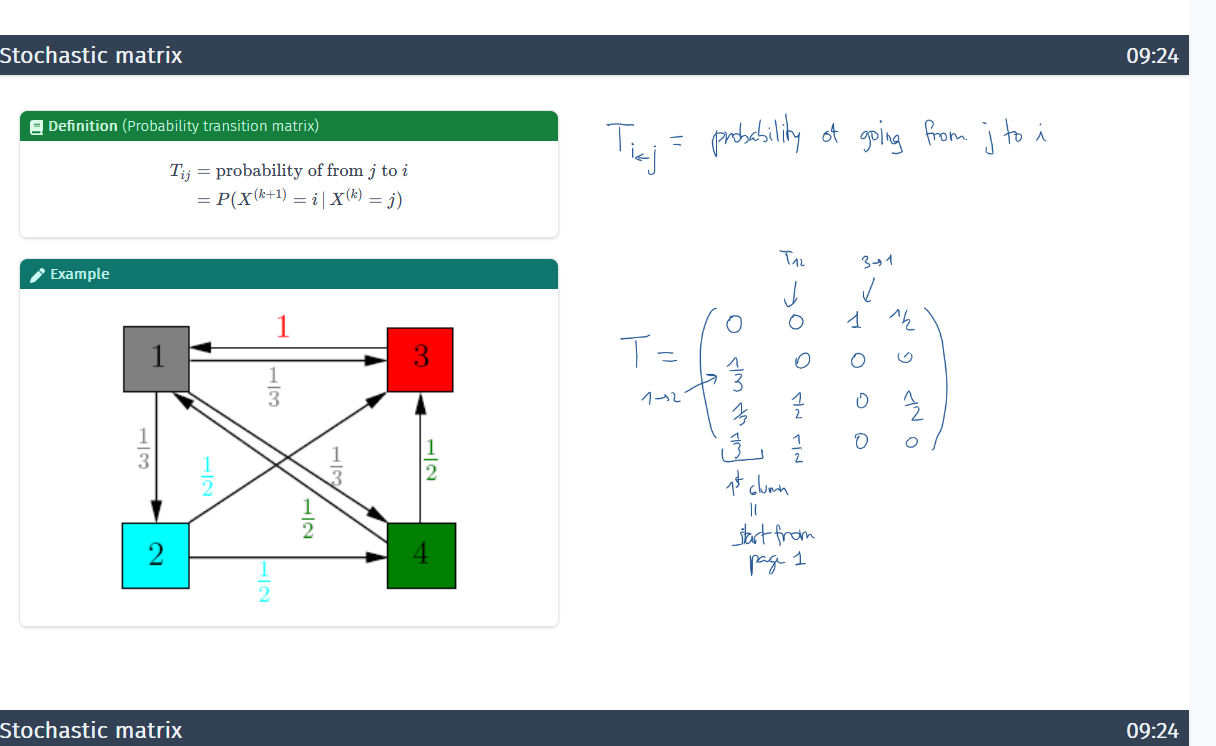

on définit la matrice de transition T:
- la colonne (j) correspond à la page de départ
- la ligne (i) correspond à la page d'arrivée
- chaque colonne de T somme à 1 

# La Formule du PageRank



Le score d'une page $p$ est calculé en additionnant la puissance transmise par toutes les pages $i$ qui pointent vers elle.

### Formule de base :
$$PR(p) = \sum_{i \in B_p} \frac{PR(i)}{L(i)}$$

**Définition des variables :**
*   $PR(p)$ : Le score PageRank de la page cible.
*   $B_p$ : L'ensemble des pages pointant vers la page $p$ (backlinks).
*   $PR(i)$ : Le score PageRank de la page source $i$.
*   $L(i)$ : Le nombre total de liens sortants sur la page $i$.

---

### Formule complète (avec facteur d'amortissement) :

La formule de base présente un problème si l'on rencontre un "trou noir" de liens (une page sans lien sortant) ou des boucles fermées. Pour simuler un comportement humain réel et garantir que l'algorithme converge, on introduit le **facteur d'amortissement** ($d$).

L'intuition est la suivante :
*   Avec une probabilité **$d$** (le "facteur de survie", souvent fixé à $0.85$), l'utilisateur continue de cliquer sur un lien de la page actuelle.
*   Avec une probabilité **$(1-d)$** (le "saut aléatoire"), l'utilisateur s'ennuie, quitte la page et tape une nouvelle URL ou clique sur ses favoris.

La probabilité d'arriver sur n'importe quelle page $p$ via ce saut aléatoire est de $\frac{1-d}{N}$ (où $N$ est le nombre total de pages).

La formule complète devient alors :

$$PR(p) = \frac{1-d}{N} + d \sum_{i \in B_p} \frac{PR(i)}{L(i)}$$

---

### Exemple visuel et application :

Si nous reprenons l'exemple avec les pages A, B et C :

*   A a 2 liens sortants (vers B et C). $L(A) = 2$.
*   B a 1 lien sortant (vers A). $L(B) = 1$.
*   C a 1 lien sortant (vers A). $L(C) = 1$.

Le calcul du PR de la page A ($PR(A)$) se base sur les pages qui la référencent (B et C) :

$$PR(A) = \frac{1-d}{3} + d \times \left( \frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} \right)$$

$$PR(A) = \frac{1-d}{3} + d \times \left( \frac{PR(B)}{1} + \frac{PR(C)}{1} \right)$$


# Méthode de Calcul à Grande Échelle

Le calcul direct (analytique) d'une matrice de transition pour des milliards de pages est impossible informatiquement. Google utilise donc une méthode d'**approximation itérative** :

1.  **Initialisation :** Toutes les pages reçoivent un score $1/N$.
2.  **Itérations :** On applique la formule complète de manière répétée.
3.  **Convergence :** Le processus s'arrête lorsque les scores se stabilisent (convergent).

Cette méthode, appelée **méthode de la puissance** (*Power Method*), permet de calculer le PageRank pour l'ensemble du Web de manière efficace.

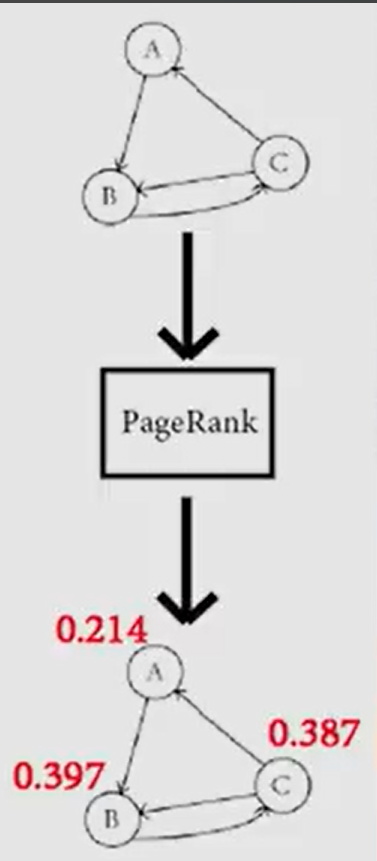

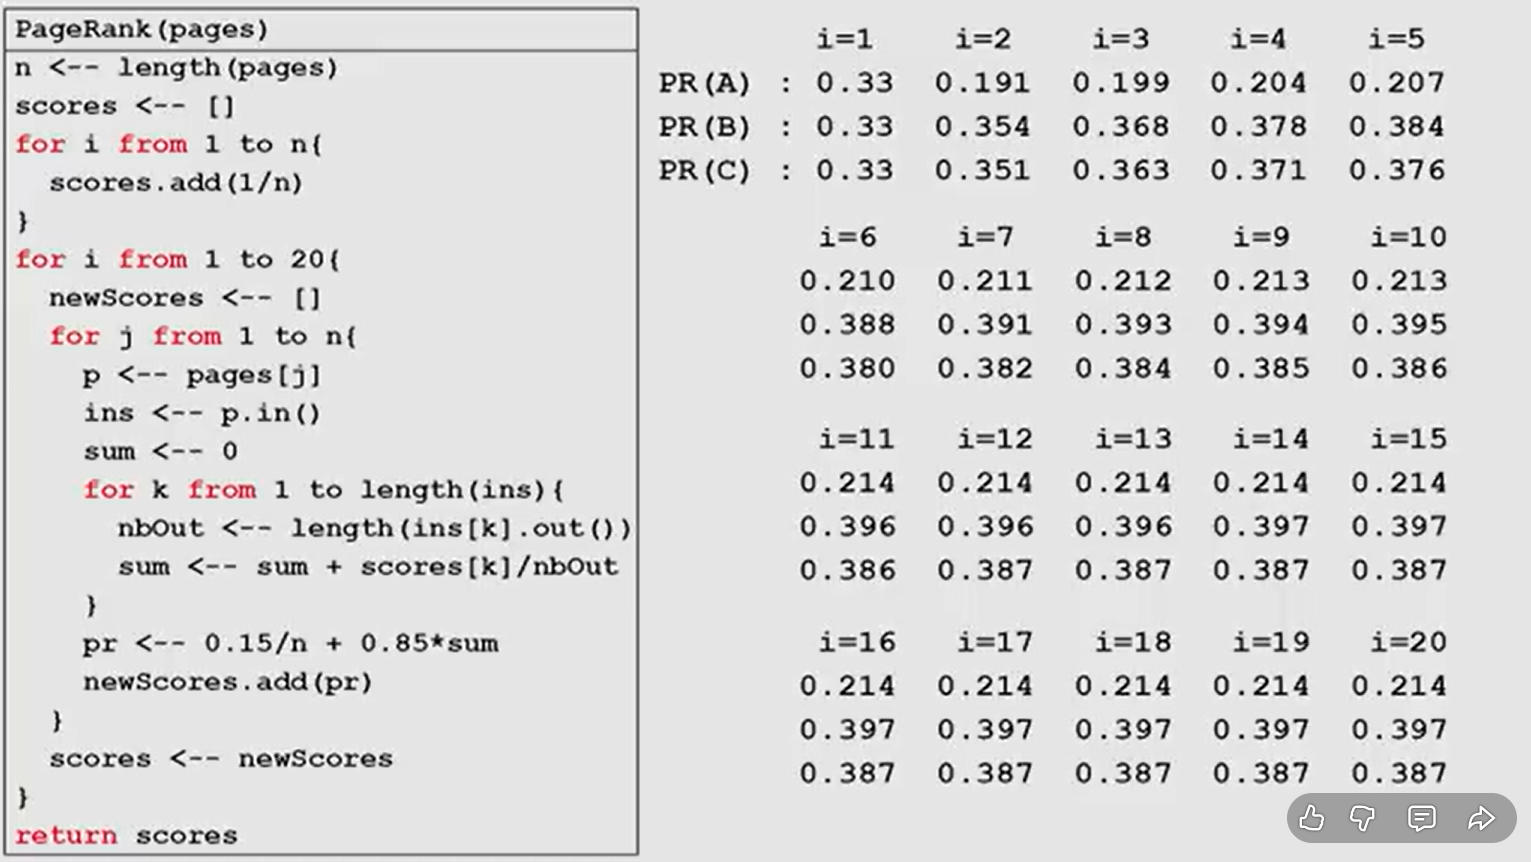

# Exemple simple du cours
 

Avant d’appliquer l’algorithme PageRank à un graphe réel de grande taille (Wikipedia),
nous validons d’abord le modèle sur un exemple simple à 4 pages.

Cet exemple permet de :
- vérifier la construction de la matrice de transition stochastique,
- valider l’itération p^{(k+1)} = T p^{(k)},
- observer la convergence vers une distribution stable,
- interpréter le résultat obtenu.

Une fois cet exemple validé, la même méthode pourra être appliquée
au graphe Wikipedia sans modification de l’algorithme.


In [9]:
import numpy as np

# Matrice de transition 
T = np.array([
    [0,   0,   1,   1/2],
    [1/3, 0,   0,   0  ],
    [1/3, 1/2, 0,   1/2],
    [1/3, 1/2, 0,   0  ],
])

# valeur initiale de p
p = np.ones(4) / 4

eps = 1e-10  # critère de convergence 
max_iter = 100

for i in range(max_iter):
    p_new = T @ p # p^(k+1) = T * p^(k)
    # critère de convergence
    if np.linalg.norm(p_new - p, 1) < eps:
        break
    p = p_new
p




array([0.38709677, 0.12903226, 0.29032258, 0.19354839])

## max, min, le top-k et le bottom-k

In [10]:
import numpy as np

# p est le vecteur final (shape (N,))
N = len(p)

idx_max = int(np.argmax(p))
idx_min = int(np.argmin(p))

print(f"Max PageRank: page {idx_max} -> {p[idx_max]:.6f}")
print(f"Min PageRank: page {idx_min} -> {p[idx_min]:.6f}")

k = 5  # top/bottom k pages
top_idx = np.argsort(-p)[:k]
bot_idx = np.argsort(p)[:k]

print("\nTop pages:")
for r, i in enumerate(top_idx, 1):
    print(f"{r:2d}. page {i} -> {p[i]:.6f}")

print("\nBottom pages:")
for r, i in enumerate(bot_idx, 1):
    print(f"{r:2d}. page {i} -> {p[i]:.6f}")


Max PageRank: page 0 -> 0.387097
Min PageRank: page 1 -> 0.129032

Top pages:
 1. page 0 -> 0.387097
 2. page 2 -> 0.290323
 3. page 3 -> 0.193548
 4. page 1 -> 0.129032

Bottom pages:
 1. page 1 -> 0.129032
 2. page 3 -> 0.193548
 3. page 2 -> 0.290323
 4. page 0 -> 0.387097


## Labels 

In [11]:
labels = ["1","2","3","4"]  

idx_max = int(np.argmax(p))
idx_min = int(np.argmin(p))

print(f"Max PageRank: {labels[idx_max]} -> {p[idx_max]:.6f}")
print(f"Min PageRank: {labels[idx_min]} -> {p[idx_min]:.6f}")

k = 5
top_idx = np.argsort(-p)[:k]
bot_idx = np.argsort(p)[:k]

print("\nTop pages:")
for r, i in enumerate(top_idx, 1):
    print(f"{r:2d}. {labels[i]} -> {p[i]:.6f}")

print("\nBottom pages:")
for r, i in enumerate(bot_idx, 1):
    print(f"{r:2d}. {labels[i]} -> {p[i]:.6f}")


Max PageRank: 1 -> 0.387097
Min PageRank: 2 -> 0.129032

Top pages:
 1. 1 -> 0.387097
 2. 3 -> 0.290323
 3. 4 -> 0.193548
 4. 2 -> 0.129032

Bottom pages:
 1. 2 -> 0.129032
 2. 4 -> 0.193548
 3. 3 -> 0.290323
 4. 1 -> 0.387097


## Plot scores avec max et min

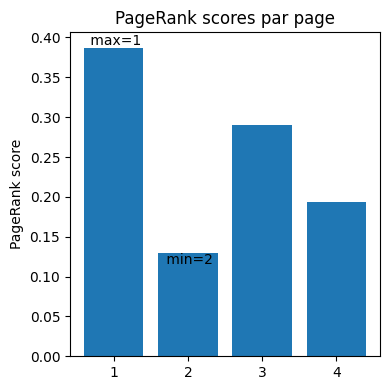

In [12]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["1","2","3","4"]  

x = np.arange(len(p))

idx_max = int(np.argmax(p))
idx_min = int(np.argmin(p))

plt.figure(figsize=(4,4))
plt.bar(x, p)
plt.xticks(x, labels)
plt.ylabel("PageRank score")
plt.title("PageRank scores par page")

# annotation max/min
plt.text(idx_max, p[idx_max], f" max={labels[idx_max]}", ha="center", va="bottom")
plt.text(idx_min, p[idx_min], f" min={labels[idx_min]}", ha="center", va="top")

plt.tight_layout()
plt.show()


## Debug

In [13]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import numpy as np

# edges = [
#     (0,1),(0,2),(0,3),
#     (1,2),(1,3),
#     (2,0),
#     (3,0),(3,2)
# ]

# labels = ["1","2","3","4"]

# G = nx.DiGraph()
# G.add_edges_from(edges)

# sizes = 3000 * (p / p.max() + 0.05)

# pos = nx.spring_layout(G, seed=1)

# plt.figure(figsize=(6,5))
# nx.draw(
#     G,
#     pos,
#     with_labels=True,
#     labels={i: labels[i] for i in range(len(labels))},
#     node_size=sizes,
#     node_color="skyblue",
#     arrows=True,
#     arrowstyle="-|>",
#     arrowsize=25,
#     width=2
# )

# plt.title("Graph links + PageRank (node size ∝ score)")
# plt.axis("off")
# plt.show()


## Plot avec score

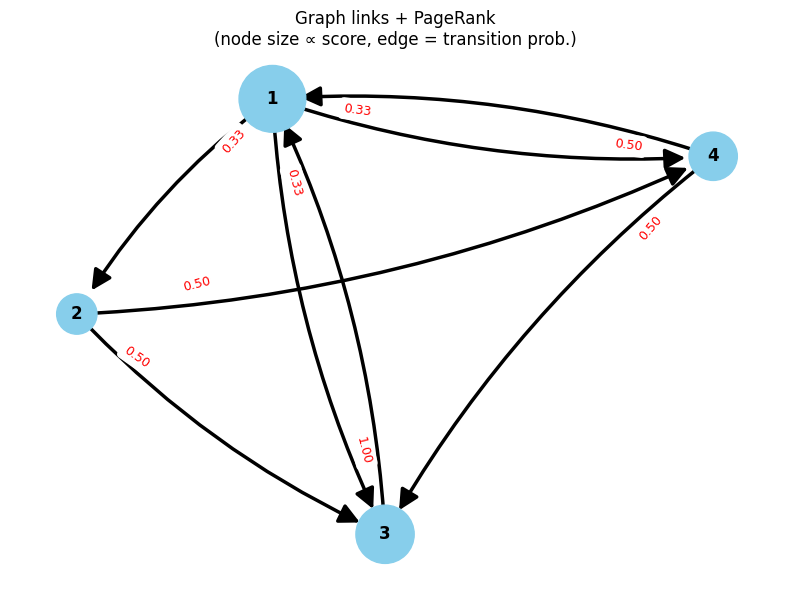

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

edges = [
    (0,1),(0,2),(0,3),
    (1,2),(1,3),
    (2,0),
    (3,0),(3,2)
]
labels = ["1","2","3","4"]

# Exemple de PageRank (remplace par ton p réel)
#p = np.array([0.3, 0.2, 0.25, 0.25])

G = nx.DiGraph()
G.add_edges_from(edges)

# Taille des nœuds ∝ PageRank 
sizes = 2200 * (p / p.max() + 0.05)
pos = nx.spring_layout(G, seed=1)

# Probabilités de transition (1 / out_degree)
out_degree = {}
for u, v in edges:
    out_degree[u] = out_degree.get(u, 0) + 1

edge_labels = {(u, v): f"{1/out_degree[u]:.2f}" for (u, v) in edges}

plt.figure(figsize=(8, 6))

# Nœuds
nx.draw_networkx_nodes(
    G, pos,
    node_size=sizes,
    node_color="skyblue"
)

# Labels des nœuds
nx.draw_networkx_labels(
    G, pos,
    labels={i: labels[i] for i in range(len(labels))},
    font_size=12,
    font_weight="bold"
)

# Arêtes (avec pointes visibles grâce aux margins)
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowstyle="-|>",
    arrowsize=30,
    width=2.5,
    edge_color="black",
    connectionstyle="arc3,rad=0.10",
    min_source_margin=15,
    min_target_margin=20
)

# Labels des arêtes (probabilités)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=9,
    font_color="red",
    label_pos=0.18
)

plt.title("Graph links + PageRank\n(node size ∝ score, edge = transition prob.)")
plt.axis("off")
plt.tight_layout()
plt.show()


# Wikipedia Page Rank

## imports

In [15]:
import numpy as np
import pandas as pd
from scipy.sparse import csc_matrix
import networkx as nx

## Load et parse

In [120]:
edges_src = pd.read_csv("data/edges.csv")
names_src = pd.read_csv("data/names.csv", encoding="utf-8")





print("Aperçu du fichier edges.csv :")
print(edges_src.head(), "\n")

print("Aperçu du fichier names.csv :")
print(names_src.head(), "\n")

# Statistiques globales

edges_total = len(edges_src)
names_total = len(names_src)

print(f"Nombre total d'arêtes (liens) : {edges_total:,}")
print(f"Nombre total de pages : {names_total:,}")
print(f"Nombre moyen de liens par page : {edges_total / names_total:.2f}")  

pages_avec_liens_sortants = edges_src["FromNode"].nunique()
pages_avec_liens_entrants = edges_src["ToNode"].nunique()

print(f"Pages avec au moins un lien sortant : {pages_avec_liens_sortants:,}")
print(f"Pages avec au moins un lien entrant : {pages_avec_liens_entrants:,}")

min_from = edges_src["FromNode"].min()
max_from = edges_src["FromNode"].max()

min_to = edges_src["ToNode"].min()
max_to = edges_src["ToNode"].max()

print("ID range dans edges.csv :")
print(f"FromNode : min = {min_from}, max = {max_from}")
print(f"ToNode   : min = {min_to},   max = {max_to}")



Aperçu du fichier edges.csv :
   FromNode  ToNode
0    175973       1
1    130880       2
2    145856       2
3    159190       2
4    159200       2 

Aperçu du fichier names.csv :
                                                Name
0                              Morphological parsing
1                              Site-specific theatre
2  Cyclopaedia, or an Universal Dictionary of Art...
3                                   Ephraim Chambers
4                           Chambers's Encyclopaedia 

Nombre total d'arêtes (liens) : 10,722,190
Nombre total de pages : 199,903
Nombre moyen de liens par page : 53.64
Pages avec au moins un lien sortant : 199,903
Pages avec au moins un lien entrant : 199,899
ID range dans edges.csv :
FromNode : min = 1, max = 199903
ToNode   : min = 1,   max = 199903


## construire le mapping page-liens sortants

In [109]:
N = len(names_src)

# Dictionnaire: page - liste des pages pointées
outgoing = edges_src.groupby("FromNode")["ToNode"].apply(list).to_dict()

print("Mapping des liens sortants construit.")
print(f"Nombre de pages présentes dans le mapping : {len(outgoing):,} / {N:,}")

for page_id in [1, 2, 3, 175973]:
    voisins = outgoing.get(page_id, [])
    nom = names_src.iloc[page_id - 1]["Name"]  # Ajustement de l'indexation
    print(f"\nPage {page_id} ('{nom}') pointe vers {len(voisins)} page(s).")
    print("Exemple des 10 premiers liens:", voisins[:10])


Mapping des liens sortants construit.
Nombre de pages présentes dans le mapping : 199,903 / 199,903

Page 1 ('Morphological parsing') pointe vers 4 page(s).
Exemple des 10 premiers liens: [2969, 54210, 175096, 175973]

Page 2 ('Site-specific theatre') pointe vers 12 page(s).
Exemple des 10 premiers liens: [5307, 11587, 49018, 136973, 145457, 145795, 145856, 146162, 159195, 159200]

Page 3 ('Cyclopaedia, or an Universal Dictionary of Arts and Sciences') pointe vers 24 page(s).
Exemple des 10 premiers liens: [4, 5345, 5822, 23228, 28130, 51465, 60041, 75391, 79161, 82366]

Page 175973 ('Morpheme') pointe vers 40 page(s).
Exemple des 10 premiers liens: [1, 81778, 104679, 150688, 175096, 175098, 175316, 175379, 175409, 175493]


## Construire la matrice sparse T (avec dangling nodes)

In [127]:
src = edges_src["FromNode"].to_numpy(dtype=np.int64) - 1  
dst = edges_src["ToNode"].to_numpy(dtype=np.int64) - 1


N = len(names_src) # O(1)

print(f"N (names.csv) : {N:,}")
print(f"src range: [{src.min()}, {src.max()}]")  
print(f"dst range: [{dst.min()}, {dst.max()}]") 


out_degree = np.bincount(src, minlength=N) # O(N + E)
print("Exemples out_degree pour les 10 premières pages :", out_degree[:10])



# Dangling nodes Pages sans liens sortants (out_degree == 0)
dangling = (out_degree == 0) # O(N)
print(f"Nombre de dangling nodes : {dangling.sum():,}")

if dangling.any():
    idx = np.where(dangling)[0]
    print(f"Indices min/max des dangling nodes : {idx.min()} -> {idx.max()}")
    print("Exemples (10 premiers) :", idx[:10])
else:
    print("Aucun dangling node détecté.")



weights = 1.0 / out_degree[src] # O(E)
print("Exemples de poids pour les 10 premières arêtes :", weights[:10])


# Matrice de transition creuse T 
#  T[i, j] = P(aller vers i | on est sur j)
#  Utilisation PageRank : p_next = T @ p

T = csc_matrix((weights, (dst, src)), shape=(N, N)) # O(E)

print("\nMatrice T construite.")
print("T shape:", T.shape)
print(f"T nnz: {T.nnz:,}")

print("\nExtrait T[:5, :5]:")
print(T[:5, :5].toarray())



N (names.csv) : 199,903
src range: [0, 199902]
dst range: [0, 199902]
Exemples out_degree pour les 10 premières pages : [ 4 12 24 13 12  4 10 34  8 12]
Nombre de dangling nodes : 0
Aucun dangling node détecté.
Exemples de poids pour les 10 premières arêtes : [0.025      0.00793651 0.01265823 0.0625     0.01754386 0.02564103
 0.00371747 0.07692308 0.08333333 0.0125    ]

Matrice T construite.
T shape: (199903, 199903)
T nnz: 10,722,190

Extrait T[:5, :5]:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.07692308 0.08333333]
 [0.         0.         0.04166667 0.         0.08333333]
 [0.         0.         0.         0.         0.        ]]


In [60]:

# # DEBUG 

# K = 5  # nombre de pages à inspecter (0..4)

# print("\nINFORMATIONS DE BASE")
# for j in range(K):
#     print(f"Page {j} ({names_src.iloc[j]['Name']})")
#     print(f"  out_degree[{j}] = {out_degree[j]}")
#     print()

# print("\nLIENS SORTANTS (j -> i)")
# for j in range(K):
#     targets = dst[src == j]
#     if len(targets) == 0:
#         print(f"Page {j} -> aucun lien sortant")
#     else:
#         print(f"Page {j} pointe vers : {targets}")
#         print(f"  poids par lien = 1/{out_degree[j]} = {1/out_degree[j]:.6f}")
#     print()

# print("\nMATRICE T : colonnes j (distribution du score)")
# T_dense = T[:K, :K].toarray()

# for j in range(K):
#     print(f"Colonne j = {j} (page source {j})")
#     for i in range(K):
#         if T_dense[i, j] != 0:
#             print(f"  T[{i},{j}] = {T_dense[i,j]:.6f}  "
#                   f"(page {j} -> page {i})")
#     print()

# print("\nMATRICE T : lignes i (score reçu)")
# for i in range(K):
#     print(f"Ligne i = {i} (page destination {i})")
#     for j in range(K):
#         if T_dense[i, j] != 0:
#             print(f"  T[{i},{j}] = {T_dense[i,j]:.6f}  "
#                   f"(reçoit depuis page {j})")
#     print()


## Itérations PageRank jusqu’à convergence


In [ ]:
eps = 1e-10
max_iter = 200
damping = 0.85  

# Vecteur initial uniforme
p = np.ones(N, dtype=np.float64) / N
uniform = np.ones(N, dtype=np.float64) / N

print("Début des itérations PageRank...")
print(f"Somme initiale de p : {p.sum():.12f}")

for k in range(max_iter):
    # p^{(k+1)} = T p^{(k)}
    p_next = T @ p

    # Correction dangling redistribution uniforme
    dangling_mass = p[dangling].sum()
    if dangling_mass > 0:
        p_next = p_next + dangling_mass * uniform

    # damping
    p_next = damping * p_next + (1 - damping) * uniform 

    # Critère d'arrêt (norme L1)
    diff = np.linalg.norm(p_next - p, 1)

    # Affichage de suivi (toutes les 10 itérations)
    if (k + 1) % 10 == 0 or k == 0:
        print(f"Itération {k+1:3d} | variation L1 = {diff:.3e} | somme(p) = {p_next.sum():.12f}")

    p = p_next
    if diff < eps:
        print(f"\nConvergence atteinte après {k+1} itérations (variation L1 = {diff:.3e})")
        break

print(f"\nSomme finale de p : {p.sum():.12f}")
print(f"Score min = {p.min():.6e} | score max = {p.max():.6e}")



Début des itérations PageRank...
Somme initiale de p : 1.000000000000
Itération   1 | variation L1 = 8.195e-01 | somme(p) = 1.000000000000
Itération  10 | variation L1 = 1.133e-03 | somme(p) = 1.000000000000
Itération  20 | variation L1 = 3.884e-05 | somme(p) = 1.000000000000
Itération  30 | variation L1 = 1.945e-06 | somme(p) = 1.000000000000
Itération  40 | variation L1 = 1.105e-07 | somme(p) = 1.000000000000
Itération  50 | variation L1 = 6.349e-09 | somme(p) = 1.000000000000
Itération  60 | variation L1 = 3.675e-10 | somme(p) = 1.000000000000

Convergence atteinte après 65 itérations (variation L1 = 8.862e-11)

Somme finale de p : 1.000000000000
Score min = 7.503639e-07 | score max = 2.348165e-03


## Top 100 pages les plus importantes (PageRank)

In [123]:
top_k = 100
top_idx = np.argsort(-p)[:top_k]

names = names_src["Name"].to_numpy()

resultats = pd.DataFrame({
    "rang": np.arange(1, top_k + 1),
    "page_id": top_idx + 1,                    
    "nom": [names[i] for i in top_idx],        
    "score": p[top_idx]
})

print(resultats.to_string(index=False))


 rang  page_id                                nom    score
    1   112356                      United States 0.002348
    2   168241                     United Kingdom 0.001282
    3   138128                       World War II 0.001051
    4    60041                             France 0.000990
    5   184958                              Latin 0.000853
    6   138420                            Germany 0.000847
    7   151511                             Canada 0.000729
    8    49148                   English language 0.000695
    9   149853                              China 0.000694
   10   145591                              India 0.000679
   11   156485                              Italy 0.000657
   12   179823                    Catholic Church 0.000625
   13    93823                          Australia 0.000623
   14   155603                            England 0.000621
   15   182570                        World War I 0.000579
   16   104756                             London 0.0005

In [66]:
# names = names_src["Name"].to_numpy()


# idx_fr = np.where(names == "France")[0]
# print("Index(s) de 'France' dans names.csv:", idx_fr)


# if len(idx_fr) > 0:
#     print("page_id (edges) =", idx_fr[0] + 1)

# # Vérifier ce que ton tableau affiche
# row = resultats[resultats["nom"] == "France"].head(1)
# print(row)
# if len(row) > 0:
#     pid = int(row["page_id"].iloc[0])
#     print("Nom via names_src.iloc[page_id-1] =",
#           names_src.iloc[pid - 1]["Name"])


## Bottom 100 pages (PageRank le plus faible)

In [124]:
bottom_k = 100
bottom_idx = np.argsort(p)[:bottom_k]  

names = names_src["Name"].to_numpy()

resultats_bottom = pd.DataFrame({
    "rang": np.arange(1, bottom_k + 1),
    "page_id": bottom_idx + 1,           
    "nom": names[bottom_idx],            
    "score": p[bottom_idx]
})

print(resultats_bottom.to_string(index=False))


 rang  page_id                                                          nom        score
    1    58609                                         Communes of Cameroon 7.503639e-07
    2   157068                             Administrative divisions of Iran 7.503639e-07
    3   173527                                    List of cities in Tunisia 7.503639e-07
    4   124453                                       1991 Bangladesh census 7.503639e-07
    5    71190                                    Sub-prefectures of Guinea 7.559653e-07
    6    68590                                         Districts of Liberia 7.559653e-07
    7   152794                                                       JANJAN 7.664184e-07
    8   179100                                List of Prague Metro stations 7.674271e-07
    9   111721                                           List of lost films 7.694875e-07
   10   163144                             List of German television series 7.709406e-07
   11   193765       

## Max et Min

In [70]:
# Raccourci vers les noms
names = names_src["Name"].to_numpy()

def page_name(i):
    return names[i] if i < len(names) else f"Page_{i}"

# Max / Min
idx_max = int(np.argmax(p))
idx_min = int(np.argmin(p))

print(f"Page avec le PageRank maximum : {page_name(idx_max)} (id={idx_max}) -> {p[idx_max]:.6e}")
print(f"Page avec le PageRank minimum : {page_name(idx_min)} (id={idx_min}) -> {p[idx_min]:.6e}")

# Top / Bottom k
k = 5

top_idx = np.argsort(-p)[:k]
bot_idx = np.argsort(p)[:k]

print("\nTop pages :")
for r, i in enumerate(top_idx, 1):
    print(f"{r:2d}. {page_name(i)} (id={i}) - {p[i]:.6e}")

print("\nBottom pages :")
for r, i in enumerate(bot_idx, 1):
    print(f"{r:2d}. {page_name(i)} (id={i}) - {p[i]:.6e}")

Page avec le PageRank maximum : United States (id=112355) -> 2.490766e-03
Page avec le PageRank minimum : Communes of Cameroon (id=58608) -> 0.000000e+00

Top pages :
 1. United States (id=112355) - 2.490766e-03
 2. United Kingdom (id=168240) - 1.390022e-03
 3. World War II (id=138127) - 1.131078e-03
 4. Latin (id=184957) - 1.084389e-03
 5. France (id=60040) - 1.077106e-03

Bottom pages :
 1. List of cities in Tunisia (id=173526) - 0.000000e+00
 2. Communes of Cameroon (id=58608) - 0.000000e+00
 3. 1991 Bangladesh census (id=124452) - 0.000000e+00
 4. Administrative divisions of Iran (id=157067) - 0.000000e+00
 5. Districts of Liberia (id=68589) - 6.334862e-09


## Plot scores avec max et min

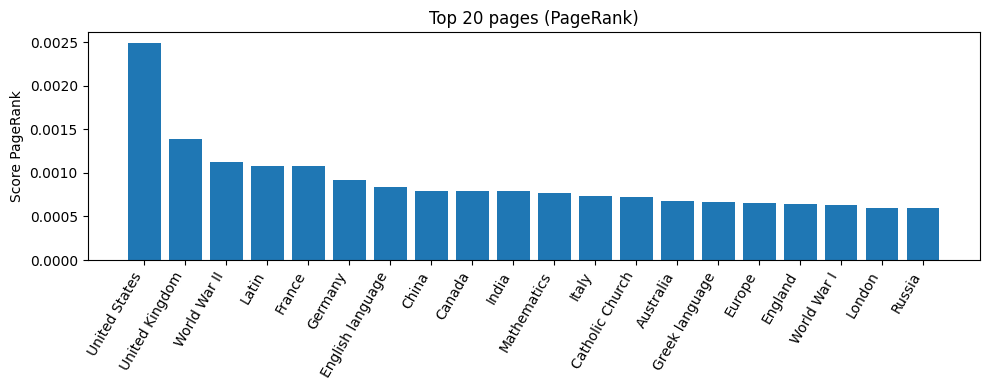

In [69]:
top_k = 20
top_idx = np.argsort(-p)[:top_k]
top_scores = p[top_idx]

names = names_src["Name"].to_numpy()
def page_name(i): return names[i] if i < len(names) else f"Page_{i}"

labels_top = [page_name(i) for i in top_idx]
x = np.arange(top_k)

plt.figure(figsize=(10,4))
plt.bar(x, top_scores)
plt.xticks(x, labels_top, rotation=60, ha="right")
plt.ylabel("Score PageRank")
plt.title(f"Top {top_k} pages (PageRank)")
plt.tight_layout()
plt.show()


## Plot avec score

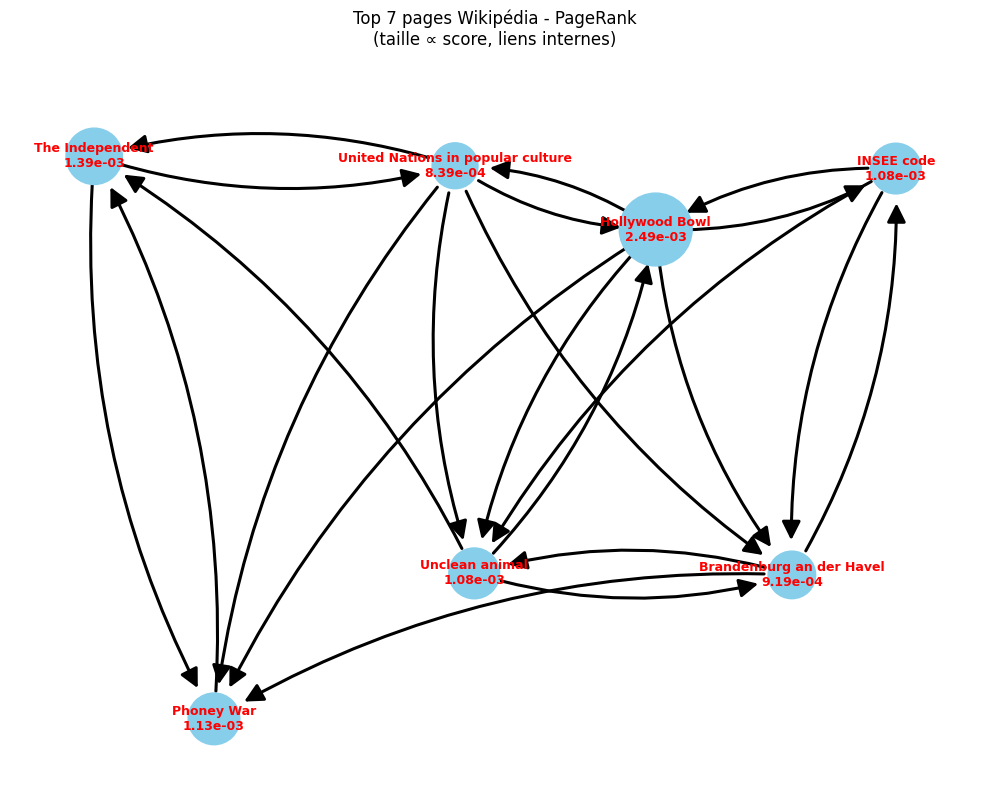

In [96]:
# Sélection TOP 10 PageRank
top_k = 7
top_idx = np.argsort(-p)[:top_k]
top_set = set(top_idx)

# Récupération des noms
names = names_src["Name"].to_numpy()
def page_name(i):
    return names[i] if i < len(names) else f"Page_{i}"

labels = {i: f"{page_name(i)}\n{p[i]:.2e}" for i in top_idx}

# filtrer les arêtes ENTRE les pages du top 10
src = edges_src["FromNode"].to_numpy(dtype=np.int64)
dst = edges_src["ToNode"].to_numpy(dtype=np.int64)

mask = np.isin(src, top_idx) & np.isin(dst, top_idx)
edges_top = list(zip(src[mask], dst[mask]))


G = nx.DiGraph()
G.add_nodes_from(top_idx)
G.add_edges_from(edges_top)

# Taille des nœuds ∝ PageRank
sizes = 2500 * (p[top_idx] / p[top_idx].max() + 0.10)

# Layout
pos = nx.spring_layout(G, seed=1)


# plotting
plt.figure(figsize=(10, 8))

# Nœuds
nx.draw_networkx_nodes(
    G, pos,
    node_size=sizes,
    node_color="skyblue"
)

# Labels des nœuds (nom + score)
nx.draw_networkx_labels(
    G, pos,
    labels=labels,
    font_size=9,
    font_weight="bold",
    font_color="red"
    
)

# Arêtes 
nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowstyle="-|>",
    arrowsize=28,
    width=2.2,
    edge_color="black",
    connectionstyle="arc3,rad=0.15",
    min_source_margin=20,
    min_target_margin=25
)

plt.title(f"Top {top_k} pages Wikipédia - PageRank\n(taille ∝ score, liens internes)")
plt.axis("off")
plt.tight_layout()
plt.show()


# fonction de recherche 

In [122]:
def search(query, names_src, pagerank, top_k=10):
    query = query.lower().strip()

    exact, starts, contains = [], [], []

    for i in range(len(names_src)):
        name = names_src["Name"].iloc[i]

        name_str = str(name).strip()
        name_l = name_str.lower()
        score = float(pagerank[i])

        if name_l == query:
            exact.append((i, name_str, score))
        elif name_l.startswith(query):
            starts.append((i, name_str, score))
        elif query in name_l:
            contains.append((i, name_str, score))

    exact.sort(key=lambda x: x[2], reverse=True)
    starts.sort(key=lambda x: x[2], reverse=True)
    contains.sort(key=lambda x: x[2], reverse=True)

    return (exact + starts + contains)[:top_k]

search("France", names_src, p, top_k=10)

[(60040, 'France', 0.0009902445669977534),
 (156418, 'France national football team', 1.5845016619448864e-05),
 (77158, 'France in the Middle Ages', 1.0540078435448932e-05),
 (195421, 'France national rugby union team', 1.0494068880164537e-05),
 (9973, 'France TÃ©lÃ©com', 6.903732800083442e-06),
 (195957, 'France in the American Revolutionary War', 6.489791665370554e-06),
 (79223, 'Francesco I Sforza', 5.975652223231198e-06),
 (76212,
  "Francesco I de' Medici, Grand Duke of Tuscany",
  5.372408327533827e-06),
 (130148, 'France 2', 5.331505588687438e-06),
 (61820, 'France 24', 4.80889752844603e-06)]